# Сборный проект
# Анализ данных интернет-магазина компьютерных игр «Стримчик»

**Описание проекта**
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
# импортирую библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#### Шаг 1. Загрузка данных и знакомство с ними

In [2]:
# открываю файл с данными
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Выведу первые 20 строк
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# вывожу информацию о файле data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# вывожу список характерных значений для столбцов
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:** По первому взгляду на данные можно сказать, что мы имеем данные с 1980 по 2016 гг., большое количество пропусков содержится в столбцах с рейтингом и оценками пользователей и критиков. Также можно отметить, что многие игры не продавались совсем, так как квантили 25% по столбцам с продажами равен нулю, а квантили 50% близки к нулю.

#### Шаг 2. Подготовка данных

##### Замена названия столбцов (приведение к нижнему регистру)

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Работа с пропусками

In [7]:
# выведу количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце с названием игры и жанром есть по два пропуска, эти строки можно просто удалить, установить название проблематично, а удаление двух строк на дальнейший анализ не повлияет.

В столбце с годом выхода пропусков меньше 10%, удалю эти строки, в исследование они бы не попали.

В столбцах с оценками критиков и пользователей пропуски оставлю, tbd("To Be Determined" - т.е., оценка будет определена позже) заменю на NaN, чтобы датафрейм был более однообразным. Замена медианным значением может сильно исказить картину при анализе.

Пропуски в столбце с возрастным рейтингом придётся заменю на "unknown", так как их нечем заменить, а их доля велика.

In [8]:
# удаляю строки с пропусками названия и жанра
data.dropna(subset = ['name', 'genre'], inplace=True)

In [9]:
# удаляю строки с пропусками с годом выхода
data.dropna(subset = ['year_of_release'], inplace=True)

In [10]:
# Заменяю пропуски и tbd оценки пользователей на нереальное значение
data.loc[data['user_score'] =='tbd','user_score'] = np.nan

In [11]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

In [12]:
# Проверю наличие пропусков
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

##### Преобразование данных в нужные типы

Необходимо поменять тип данных в столбце `year_of_release` на int и в столбце `user_score` на float. Год выхода не может быть вещественным числом, а оценка пользователей строкой.

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


##### Добавление столбца с суммарными продажами во всех регионах

In [14]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


##### Работа с дубликатами

In [15]:
# ищу явные дубликаты
data.duplicated().sum()

0

In [16]:
# обработаю неявные дубликаты
data['name'] = data['name'].str.lower()
data[data.duplicated(subset = ['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1591,need for speed: most wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,need for speed: most wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,madden nfl 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


По выбранным параметрам выпало три неявных дубликата, но need for speed: most wanted таким не является, так как это две разные игры, в 2012 году был перезапуск, а значит остаётся один неявный дубликат. 

In [17]:
data.drop_duplicates(subset = ['name', 'platform', 'year_of_release'], inplace = True)
data[data.duplicated(subset = ['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


**Вывод:** В ходе предобработки данных названия столбцов были приведены к нижнему регистру, удалены строки с пропусками в названиях, жанрах игр(2 строки) и с годом выпуска(269 строк), пропуски в столбцах `critic_score` и `user_score` были оставлены, значениями `tbd` в столбце `user_score` заменены на NaN, заменять их нечем, а так датафрейм будет более однообразным. Пропуски в столбце `rating` заменил на "unknown", так как их нечем заменить, а их доля велика.

Явных дубликатов найдено не было, был найден один неявный дубликат.

Пропуски в годе выпуска вызваны скорей всего тем, что их просто не заполнили, в столбцах `critic_score` и `user_score` могут быть связаны с отсутствием оценок пользователей и критиков, а в столбце `rating` с тем, что ESRB не сформировала рейтинг для данной игры, эта организация занимается формированием рейтинга в США и Канаде, есть также организации в Европе(PEGI) и Японии(CERO).

#### Исследовательский анализ данных

##### Распределение игр по году выпуска

In [18]:
# посчитаю количество игр по годам
distribution_by_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
distribution_by_years.columns = ['count']
distribution_by_years

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


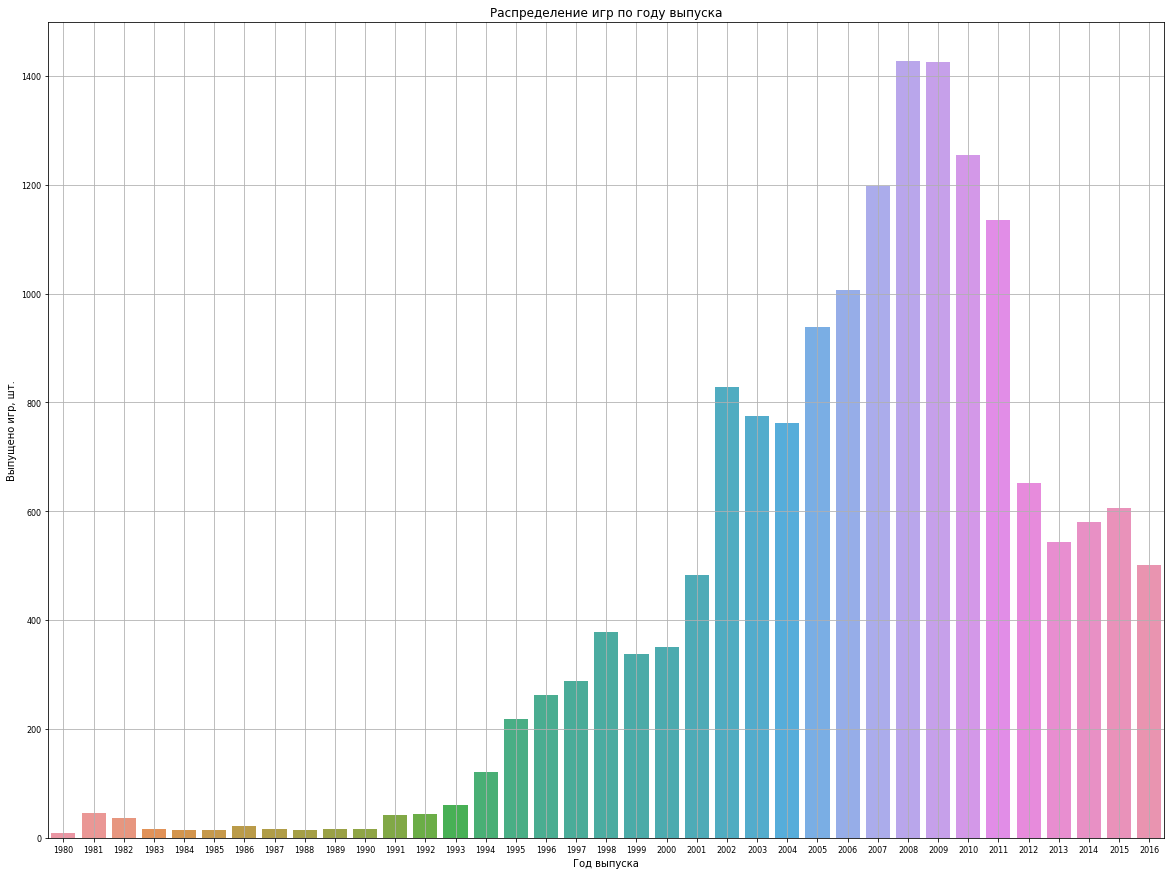

In [19]:
# визуализирую распределение по годам
plt.rcParams['figure.figsize'] = (20, 15)
sns.barplot(x = distribution_by_years.index, y = distribution_by_years['count'])
plt.xlabel('Год выпуска')
plt.ylabel('Выпущено игр, шт.')
plt.grid()
plt.title('Распределение игр по году выпуска')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

По графику можно сказать, что пик выхода игр пришёлся на период с 2007 по 2010 гг., до 1994 г. выходило меньше ста игр в год.

##### Аналаиз платформ по количеству продаж игр в разные годы

In [20]:
# выделю платформы с наибольшими суммарными продажами игр
top_platforms = data.pivot_table(index = 'platform',values = ['sum_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').nlargest(5, 'sum_sales')
top_platforms

,eu_sales,jp_sales,na_sales,sum_sales
platform,,,,
PS2,332.63,137.54,572.92,1233.56
X360,268.32,12.30,595.74,961.24
PS3,327.20,79.41,390.13,931.33
Wii,258.32,68.28,486.87,891.18
DS,188.41,175.02,380.31,802.78


In [21]:
# создам датафрейм с агрегированными данными с наименованиями платформ, общим количеством продаж и годом выпуска
platforms = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
# в полученном датафрейме много пропусков, так как многие платформы "живут" несколько, логично будет заменить их нулями
platforms.fillna(0, inplace=True)
platforms

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [22]:
top_platforms_years = platforms.query('index > 1999')
for x in platforms.columns:
    if x not in top_platforms.index:
        top_platforms_years.drop(x, axis=1, inplace=True)
top_platforms_years

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2000,0.00,39.17,0.00,0.00,0.00
2001,0.00,166.43,0.00,0.00,0.00
2002,0.00,205.38,0.00,0.00,0.00
2003,0.00,184.31,0.00,0.00,0.00
2004,17.27,211.81,0.00,0.00,0.00
2005,130.14,160.66,0.00,0.00,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26


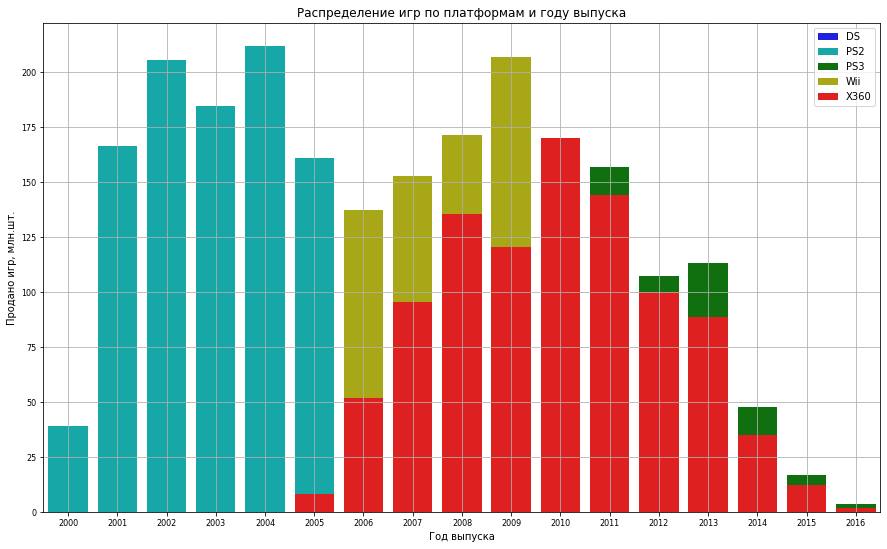

In [23]:
# визуализирую 
plt.rcParams['figure.figsize'] = (15, 9)
sns.barplot(x = top_platforms_years.index, y = top_platforms_years['DS'], label = 'DS', color = 'b')
sns.barplot(x = top_platforms_years.index, y = top_platforms_years['PS2'], label = 'PS2', color = 'c')
sns.barplot(x = top_platforms_years.index, y = top_platforms_years['PS3'], label = 'PS3', color = 'g')
sns.barplot(x = top_platforms_years.index, y = top_platforms_years['Wii'], label = 'Wii', color = 'y')
sns.barplot(x = top_platforms_years.index, y = top_platforms_years['X360'], label = 'X360', color = 'r')
plt.xlabel('Год выпуска')
plt.ylabel('Продано игр, млн.шт.')
plt.grid()
plt.legend()
plt.title('Распределение игр по платформам и году выпуска')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

Самые популярные платформы за всё время PS2, PS3, X360, Wii и DS постепнно набирали свою популярность и также постепенно её теряли, к 2016 г. утратили свою популярность.

In [24]:
# Выведу список с числом лет, которое продавались игры на разные платформы
life_years = np.count_nonzero(platforms, axis = 0)
life_years = pd.DataFrame(data = life_years, index = platforms.columns)
life_years.columns = ['life_years']
life_years

,life_years
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


In [25]:
# вывожу список характерных значений
life_years.describe()

,life_years
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


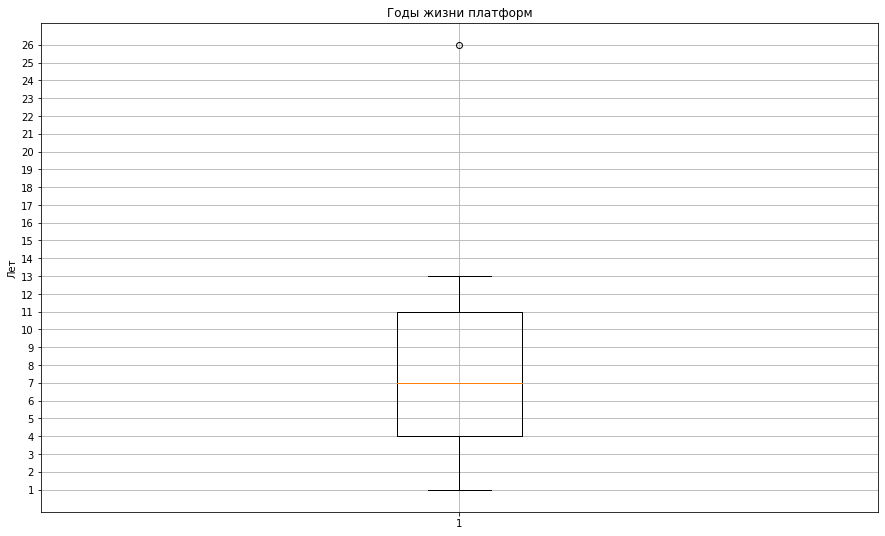

In [26]:
# построю диаграмму размаха по годам жизни платформ
plt.boxplot(life_years)
plt.title('Годы жизни платформ')
plt.ylabel('Лет')
plt.yticks(np.arange(min(life_years['life_years']), max(life_years['life_years']) + 1, 1.0)) 
plt.grid();

Нормальная продолжительность жизни платформы составляет от 4 до 11 лет, медианная и средняя продолжительности в районе 7-7.6 лет. Максимальная продолжительность 26 лет, но это ПК, который постоянно обновляется без изменения названия платформы.

##### Выбор актуального периода для прогноза 2017 года

В качестве актуального я бы взял период с 2014 по 2016 гг., так как игровая индустрия является очень динамичной, если взять больше, то можно захватить уже отжившие своё платформы.

In [27]:
# сделаю срез с основного датафрейма
actual_data = data.query('year_of_release > 2013 and platform != "PSP"')
actual_data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,fifa 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,super smash bros. for wii u and 3ds,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
99,call of duty: black ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
105,fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


##### Анализ актуального периода, определение потенциально прибыльных платформ.

In [28]:
actual_platforms = actual_data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
actual_platforms.fillna(0, inplace = True)
actual_platforms

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


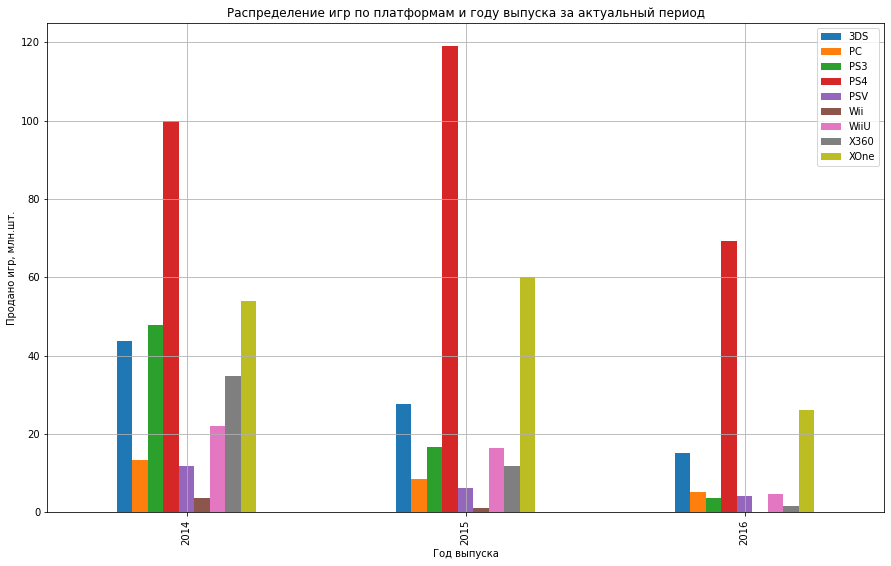

In [29]:
actual_platforms.plot(kind = 'bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продано игр, млн.шт.')
plt.grid()
plt.legend()
plt.title('Распределение игр по платформам и году выпуска за актуальный период');

По графику видно, что самыми прибыльными платформами являются Playstation 4, Xbox One, в 2015 году у этих платформ был пик, так как на них вышла очень популярная GTA 5, продажи игр по остальным платформам стабильно падают.

##### Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам.

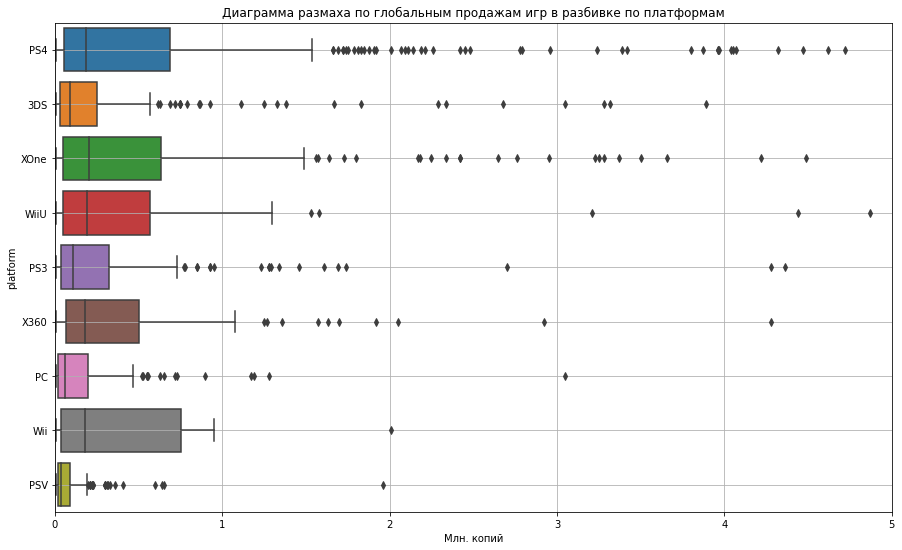

In [30]:
sns.boxplot(x = actual_data['sum_sales'], y = actual_data['platform'])
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Млн. копий')
plt.xlim(0, 5) 
plt.grid();

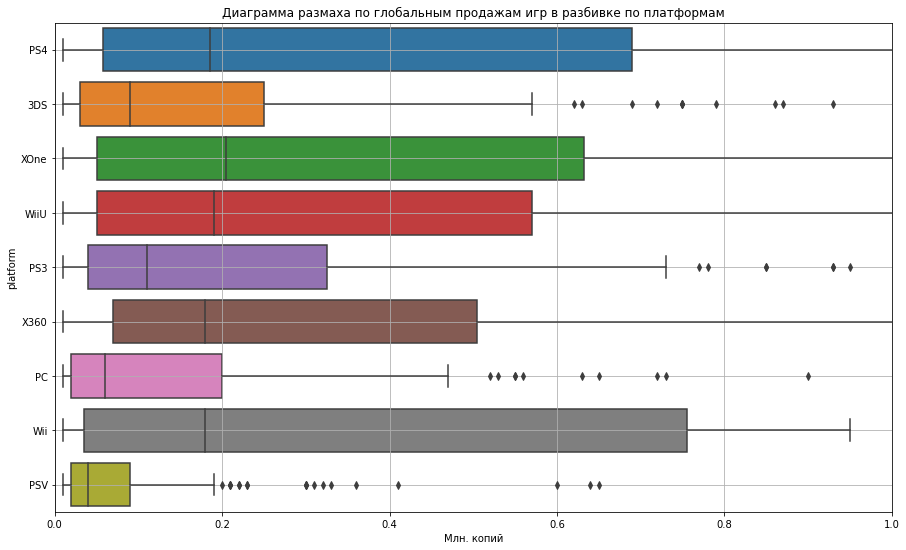

In [31]:
sns.boxplot(x = actual_data['sum_sales'], y = actual_data['platform'])
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Млн. копий')
plt.xlim(0, 1)
plt.grid();

По диаграмме размаха видно много выбросов почти у всех платформ, это может свидетельствовать о том, что выходит большое количество популярных игр. Также видно, что у всех платформ кроме XOne медиана меньше 0,2 млн. копий, т.е. у большинства платформ половина игр продаётся тиражами меньше двухсот тысяч копий, у PC вообще 75% игр продаётся меньше 200 тыс. копий.

##### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

В качестве популярной платформы возьму PS4, так как она является лидером по продажам в последние несколько актуальных лет.

In [32]:
ps4 = actual_data.query('year_of_release > 2013 and platform == "PS4"')
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,root letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,shin hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,carmageddon: max damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Коэффициент корреляции между отзывами критиков и продажами равен: 0.403


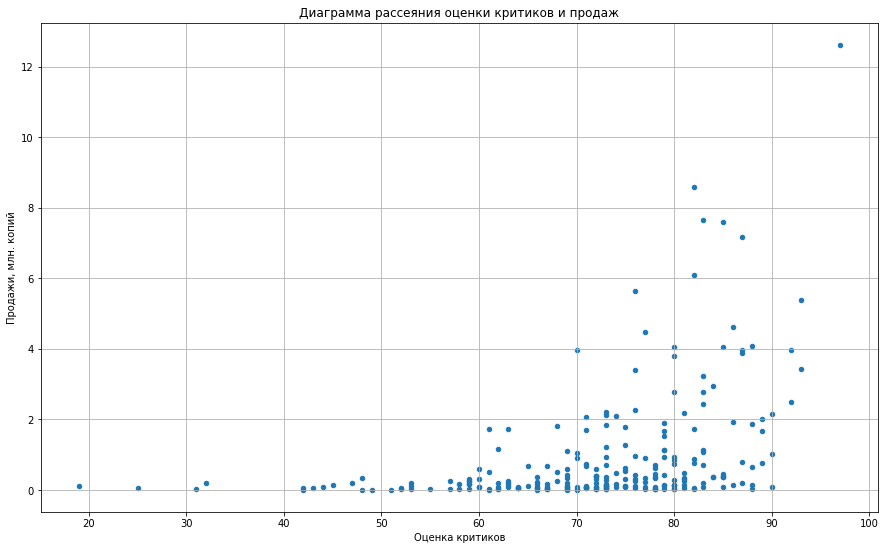

In [33]:
print('Коэффициент корреляции между отзывами критиков и продажами равен:',round(ps4['critic_score'].corr(ps4['sum_sales']), 3))

ps4.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter')
plt.title('Диаграмма рассеяния оценки критиков и продаж')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн. копий') 
plt.grid();

Коэффициент корреляции между отзывами пользователей и продажами равен: -0.04


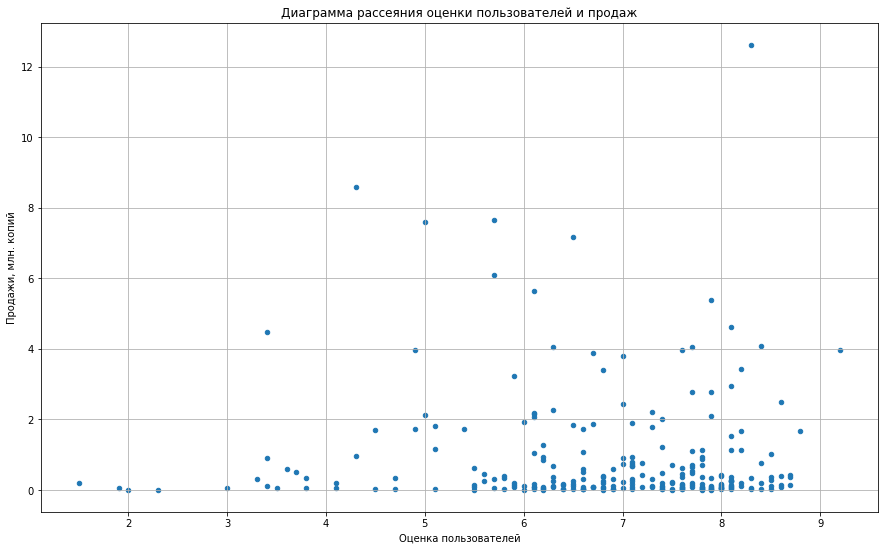

In [34]:
print('Коэффициент корреляции между отзывами пользователей и продажами равен:',round(ps4['user_score'].corr(ps4['sum_sales']), 3))

ps4.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter')
plt.title('Диаграмма рассеяния оценки пользователей и продаж')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн. копий') 
plt.grid();

Корреляция между продажами и оценкой критиков есть, но она слабая, между оценкой пользователей и продажами корреляция очень мала, а это значит, что оценка пользователей не влияет на продажи.

Далее проверю это у других популярных платформ.

X360:
Коэффициент корреляции между отзывами пользователей и продажами равен: -0.138
Коэффициент корреляции между отзывами критиков и продажами равен: 0.526
XOne:
Коэффициент корреляции между отзывами пользователей и продажами равен: -0.07
Коэффициент корреляции между отзывами критиков и продажами равен: 0.429
PS3:
Коэффициент корреляции между отзывами пользователей и продажами равен: -0.167
Коэффициент корреляции между отзывами критиков и продажами равен: 0.447
3DS:
Коэффициент корреляции между отзывами пользователей и продажами равен: 0.215
Коэффициент корреляции между отзывами критиков и продажами равен: 0.314


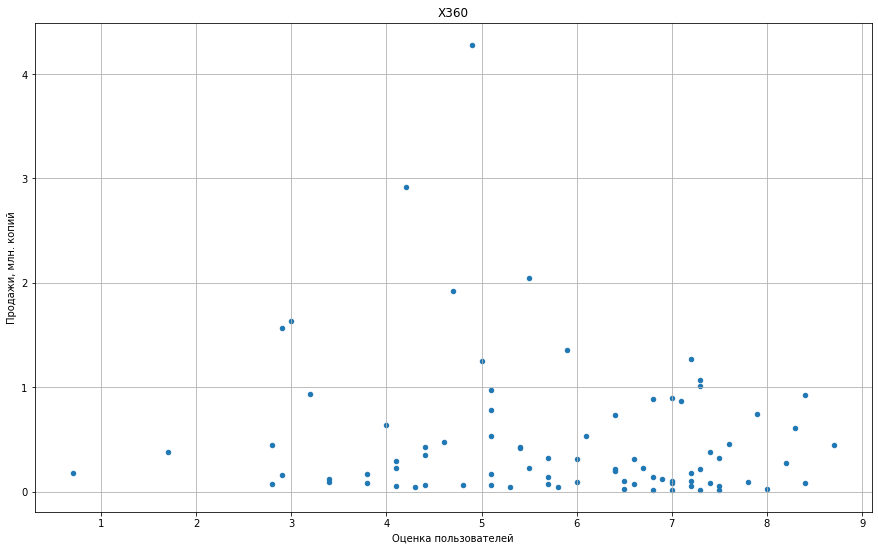

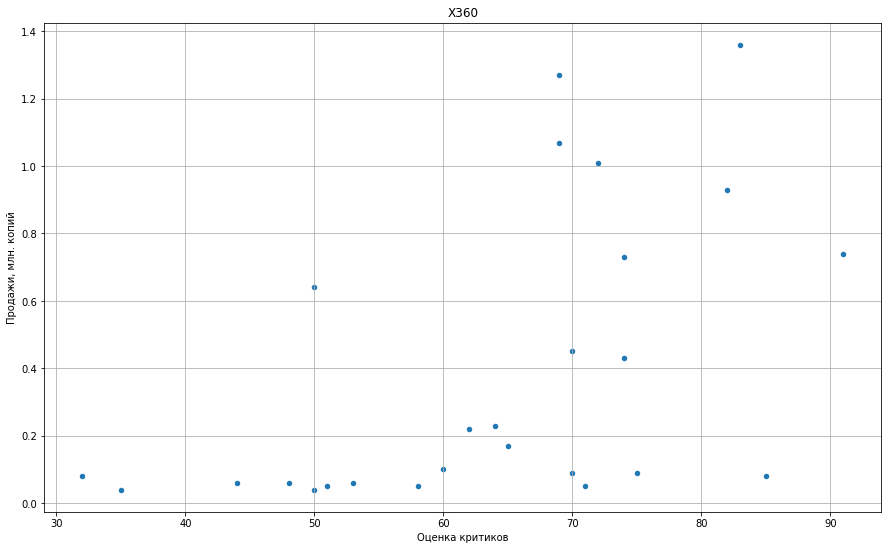

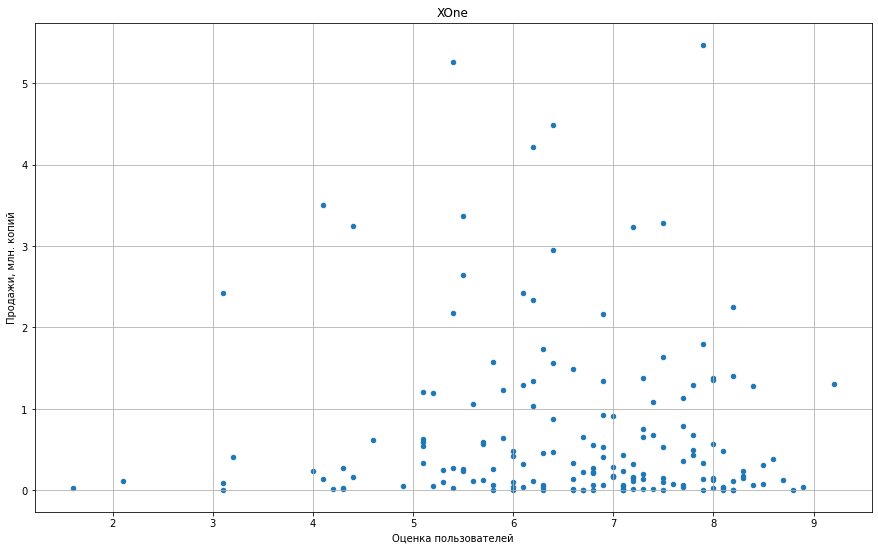

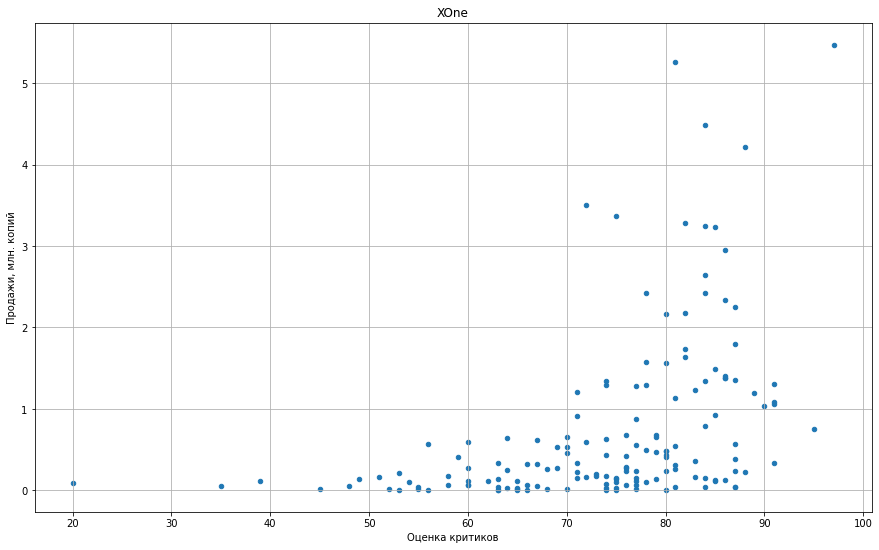

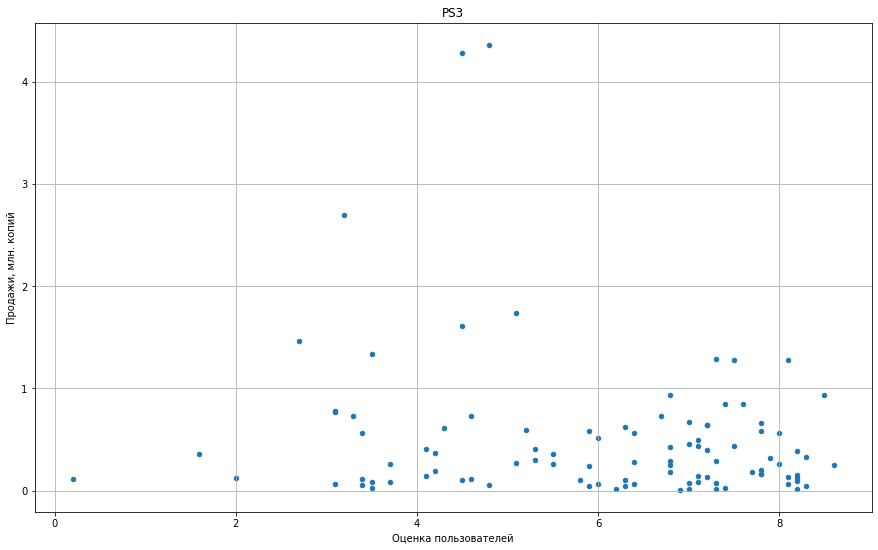

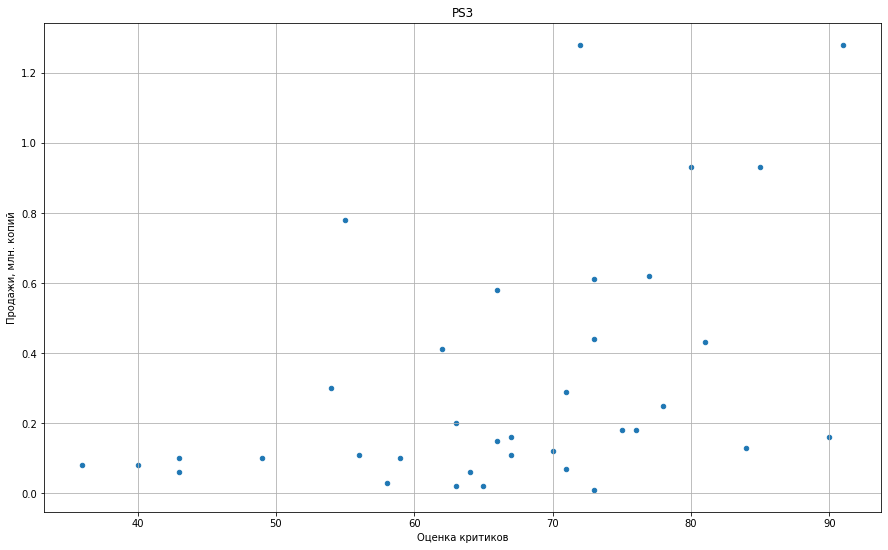

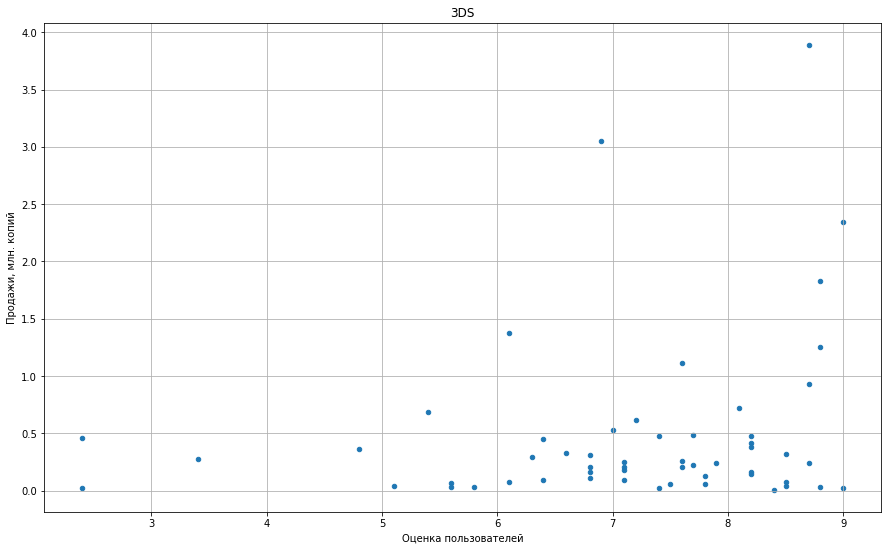

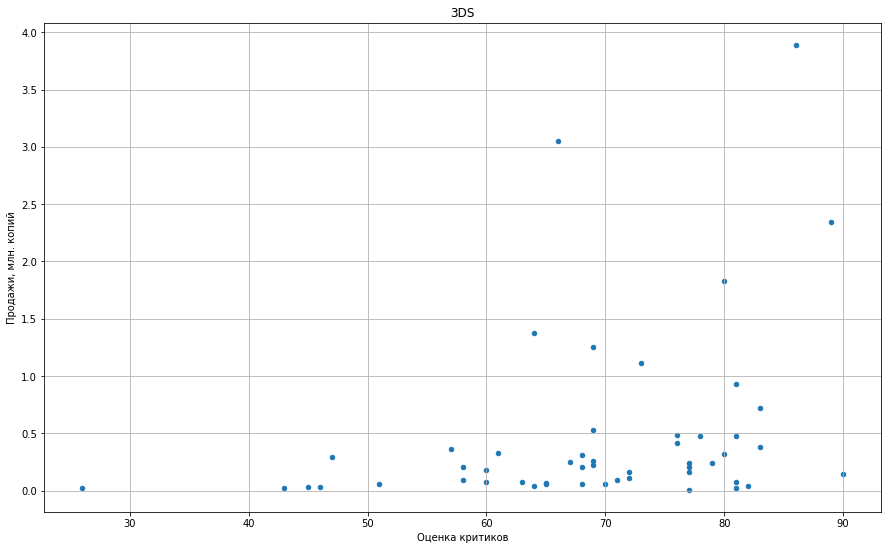

In [35]:
for x in ['X360', 'XOne', 'PS3', '3DS']:
    print(f'{x}:')
    top = actual_data.query('platform == @x and (critic_score != 105) and (user_score != 15)')
    print('Коэффициент корреляции между отзывами пользователей и продажами равен:',round(top['user_score'].corr(top['sum_sales']), 3))
    top.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter')
    plt.title(x)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи, млн. копий') 
    plt.grid()
    print('Коэффициент корреляции между отзывами критиков и продажами равен:',round(top['critic_score'].corr(top['sum_sales']), 3))
    top.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter')
    plt.title(x)
    plt.title(x)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи, млн. копий') 
    plt.grid()

С остальными популярными платформами ситуация похожая, оценки критиков на продажи влияют, но слабо, а пользовательские оценки не влияют совсем, только у Nintendo 3DS пользовательские оценки влияют немного больше на продажи игр.

##### Распределение игр по жанрам.

In [36]:
# сделаю сводные таблицы по жанрам и отсортирую по убыванию
genres_count = actual_data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'count').sort_values(by = 'sum_sales', ascending = False)
genres_sum = actual_data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)
genres_mean = actual_data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'mean').sort_values(by = 'sum_sales', ascending = False)
genres_median = actual_data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median').sort_values(by = 'sum_sales', ascending = False)

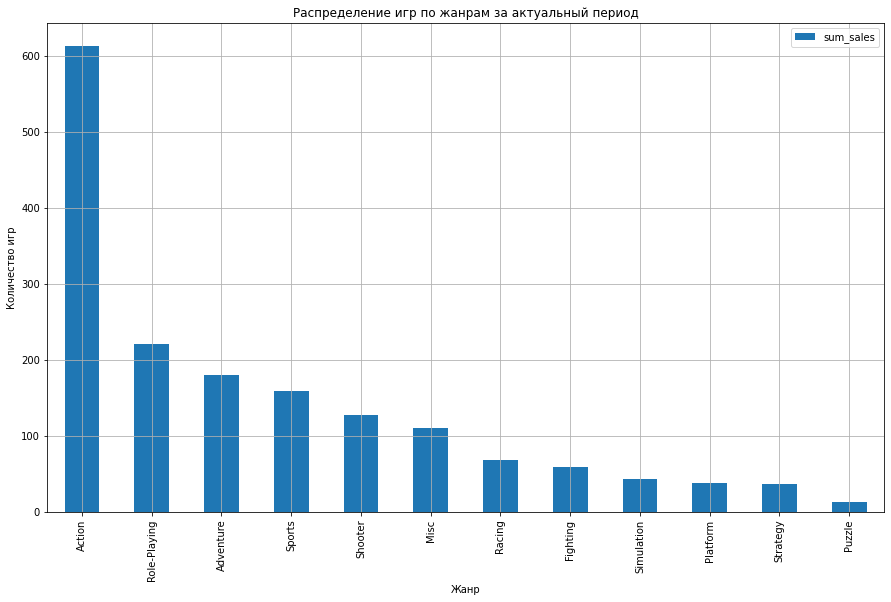

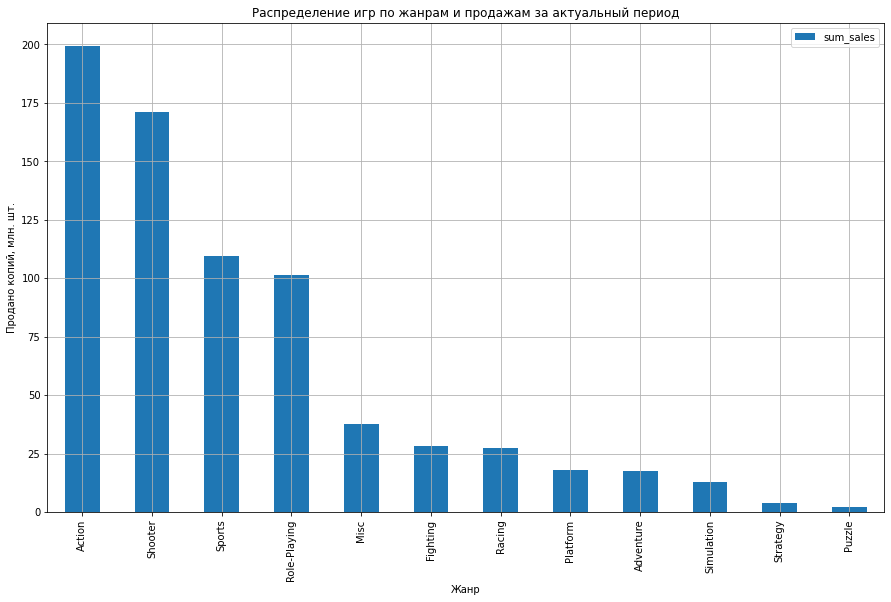

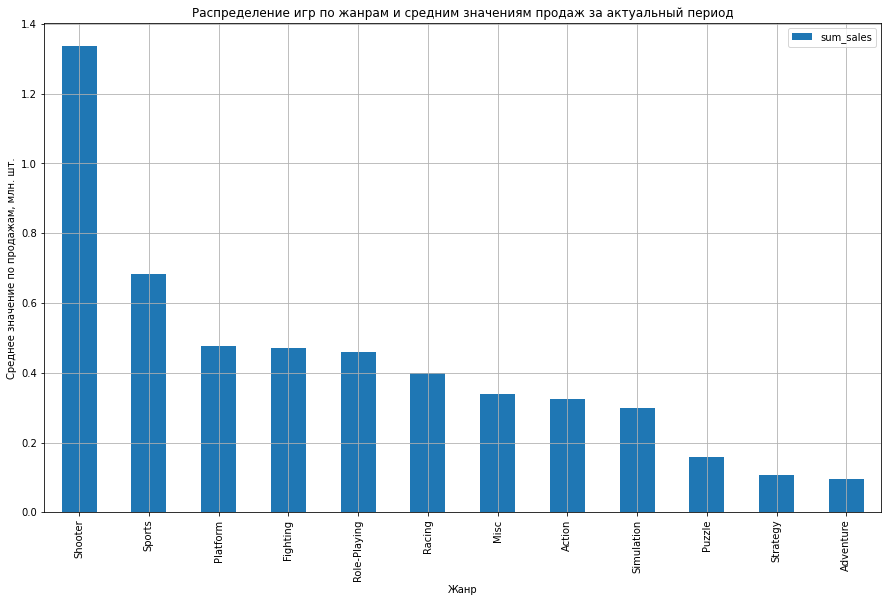

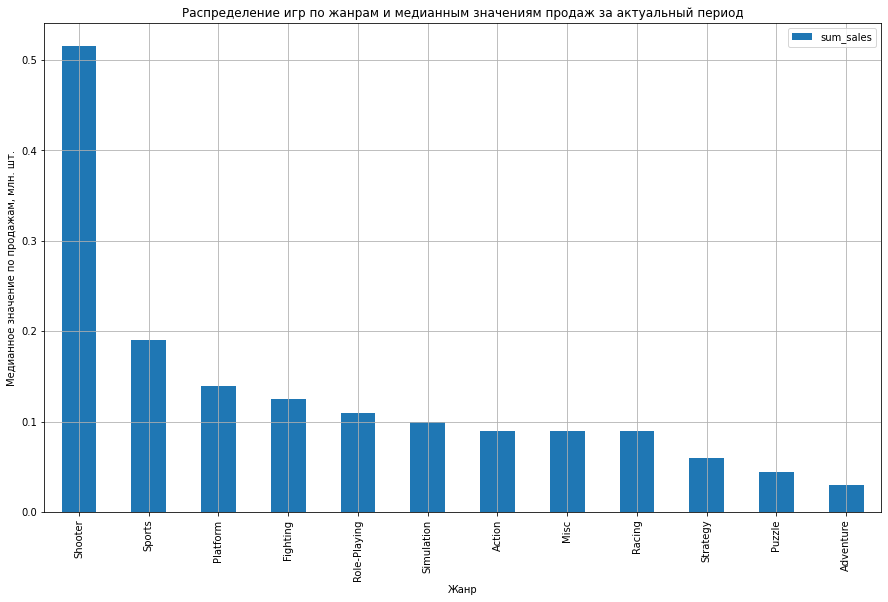

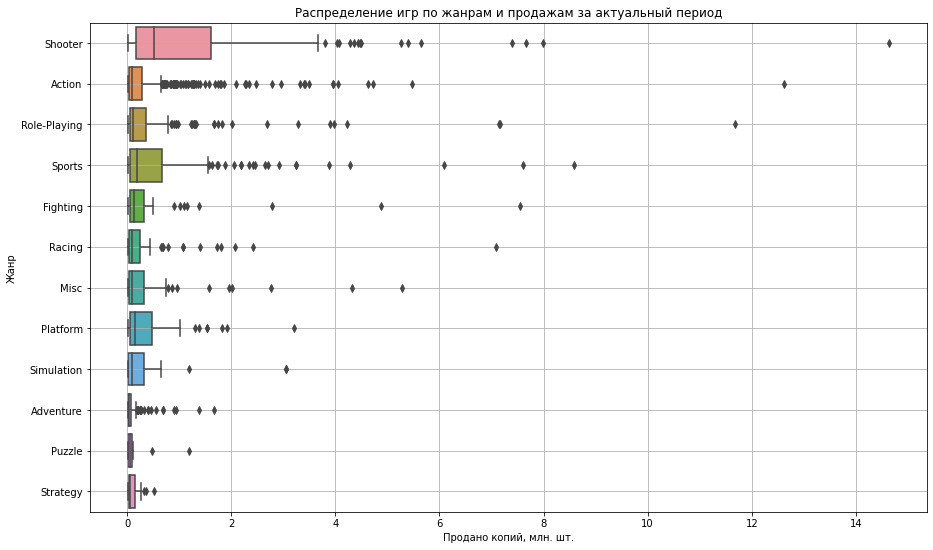

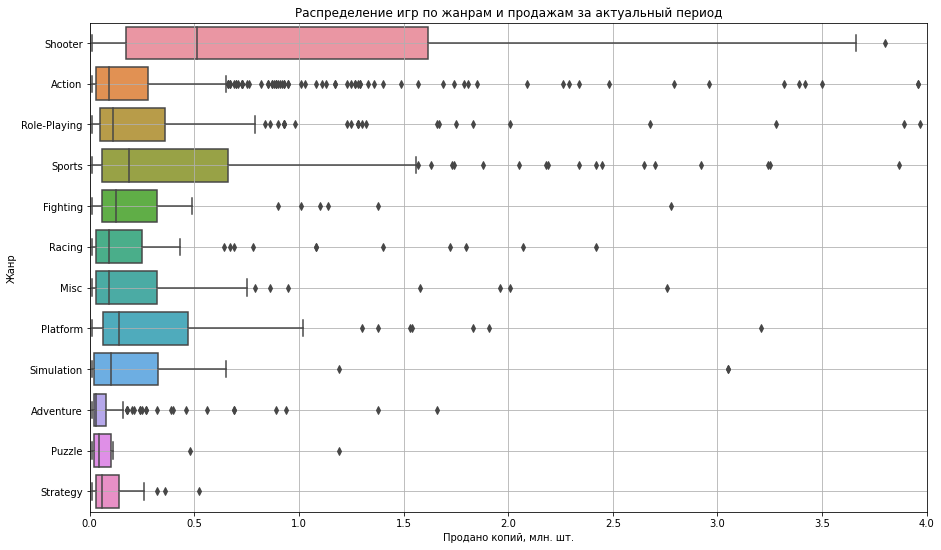

In [37]:
# визуализирую распределение по жанрам
genres_count.plot(kind = 'bar')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.grid()
plt.title('Распределение игр по жанрам за актуальный период')
plt.show()

genres_sum.plot(kind = 'bar')
plt.xlabel('Жанр')
plt.ylabel('Продано копий, млн. шт.')
plt.grid()
plt.title('Распределение игр по жанрам и продажам за актуальный период')
plt.show()

genres_mean.plot(kind = 'bar')
plt.xlabel('Жанр')
plt.ylabel('Среднее значение по продажам, млн. шт.')
plt.grid()
plt.title('Распределение игр по жанрам и средним значениям продаж за актуальный период')
plt.show()

genres_median.plot(kind = 'bar')
plt.xlabel('Жанр')
plt.ylabel('Медианное значение по продажам, млн. шт.')
plt.grid()
plt.title('Распределение игр по жанрам и медианным значениям продаж за актуальный период')
plt.show()

# построю диаграмму размаха по медианным значениям
sns.boxplot(x = actual_data['sum_sales'], y = actual_data['genre'])
plt.ylabel('Жанр')
plt.xlabel('Продано копий, млн. шт.')
plt.grid()
plt.title('Распределение игр по жанрам и продажам за актуальный период')
plt.show()

sns.boxplot(x = actual_data['sum_sales'], y = actual_data['genre'])
plt.ylabel('Жанр')
plt.xlabel('Продано копий, млн. шт.')
plt.xlim(0, 4)
plt.grid()
plt.title('Распределение игр по жанрам и продажам за актуальный период')
plt.show()

Топ жанров по количеству выпущенных игр за актуальный период:
- Action;
- Role-Playing;
- Adventure;
- Sports;
- Shooter.

Топ жанров по количеству проданных игр за актуальный период:
- Action;
- Shooter;
- Sports;
- Role-Playing;
- Misc.

Игры жанра `Action` является самым продаваемыми и выпускаемыми. Можно отметить, что при относительно небольшом количестве выпущенных игр жанра `Shooter` по продажам они вышли на второе место, а третий по выпускаемости `Adventure` вообще не попал в топ по продажам.
Самыми непопулярными жанрами являются стратегии и головоломки.

По медианным и средним значениям складывается иная картина, в топе оказались шутеры, спортивные и платформеры. А игры жанра `Action` даже не попадают в топ-5, это значит, что далеко не все игры данного жанра интересны людям.

По диаграмме размаха можно сказать, что игры жанра `Action` так хорошо продаются только за счёт бестселлеров, основная масса продаётся хуже, чем `Shooter`, `Sports`, `Role-Playing`, `Fighting`, `Platform`, `Misc` и `Simulator`. Также можно сказать, что шутеры продаются равномерно, больше игр пользуются успехом у игроков и не так сильно общие продажи зависят от бестселлеров. 

**Вывод:** 
- Пик выхода игр пришёлся на период с 2007 по 2010 гг., до 1994 г. выходило меньше ста игр в год;
- Самые популярные платформы за всё время PS2, PS3, X360, Wii и DS постепнно набирали свою популярность и также постепенно её теряли, к 2016 г. утратили свою популярность;
- Нормальная продолжительность жизни платформы составляет от 4 до 11 лет, медианная и средняя продолжительности в районе 7.7 лет;
- В качестве актуального я бы взял период с 2014 по 2016 гг;
- В актуальном периоде самыми прибыльными платформами являются Playstation 4, Xbox One, в 2015 году у этих платформ был пик, так как на них вышла очень популярная GTA 5, продажи игр по остальным платформам стабильно падают, Playstation Portable на 2016 год является мертвой платформой;
- Наблюдается прямая зависимость между отзывов критиков и продажами, зависимость между отзывами пользователей и продажами практически отсутствует;
- Игры жанра Action является самым популярными и выпускаемыми;
- По диаграмме размаха можно сказать, что игры жанра Action так хорошо продаются только за счёт бестселлеров, основная масса продаётся хуже, чем игры большинства жанров.

#### Портрет пользователя каждого региона

##### Популярные платформы по регионам

In [38]:
region_platforms = actual_data. pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
region_platforms

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30
XOne,46.25,0.32,81.27


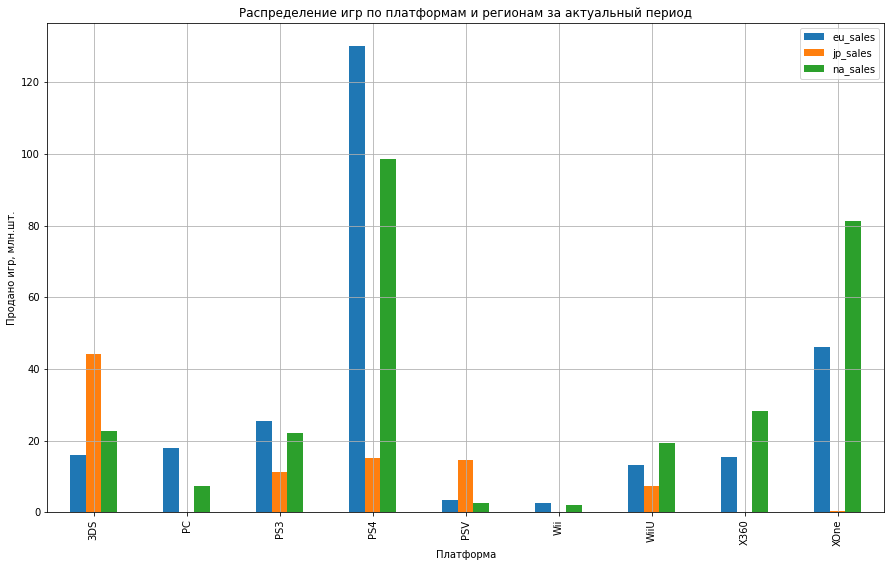

In [39]:
region_platforms.plot(kind = 'bar')
plt.xlabel('Платформа')
plt.ylabel('Продано игр, млн.шт.')
plt.grid()
plt.legend()
plt.title('Распределение игр по платформам и регионам за актуальный период');

В Европе и Северной Америке предпочтения по платформам схожи, в Японии же картина совершенно другая, не самая популярная в других регионах Nintendo 3DS тут самая популярная платформа, а PC там вообще не воспринимается игровой платформой.

Европейский топ платформ:
- PS4;
- XOne;
- PS3;
- PC;
- 3DS.


Североамериканский топ платформ:
- PS4;
- XOne;
- X360;
- 3DS;
- PS3.

Японский топ платформ:
- 3DS;
- PS4;
- PSV;
- PS3;
- WiiU.

##### Популярные жанры по регионам

In [40]:
region_genre = actual_data. pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
region_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.38,72.53
Adventure,6.49,3.55,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.59,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


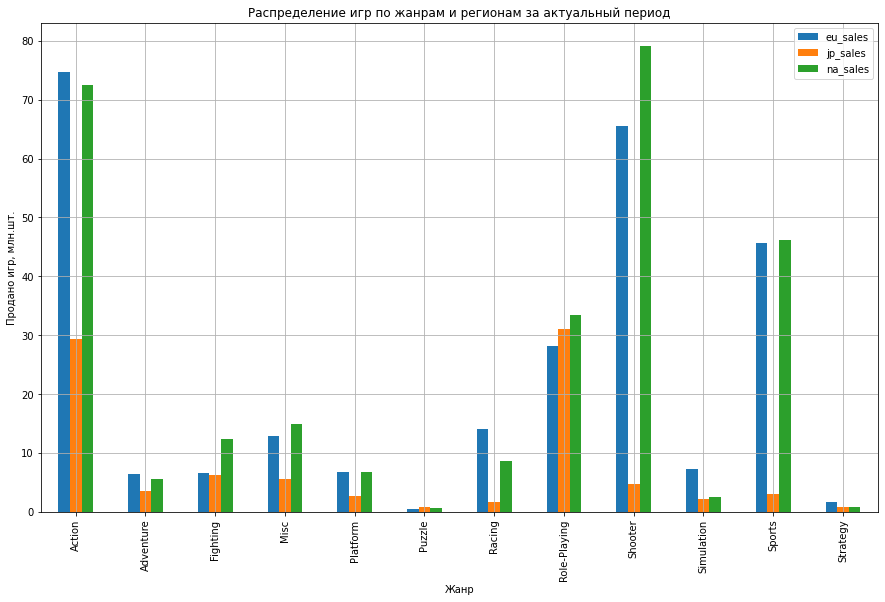

In [41]:
region_genre.plot(kind = 'bar')
plt.xlabel('Жанр')
plt.ylabel('Продано игр, млн.шт.')
plt.grid()
plt.legend()
plt.title('Распределение игр по жанрам и регионам за актуальный период');

С жанрами ситуация похожая, в Европе и Северной Америке топ практически совпадает, а в Японии предпочтения опять отличные от остальных, лидируют в стране восходящего солнца ролевые игры.

Европейский топ жанров:
- Action;
- Shooter;
- Sports;
- Role-Playing;
- Racing.

Североамериканский топ жанров:
- Shooter;
- Action;
- Sports;
- Role-Playing;
- Misc.

Японский топ жанров:
- Role-Playing;
- Action;
- Fighting;
- Misc;
- Shooter.

##### Влияние рейтинга ESRB на продажи в отдельном регионе

In [42]:
region_rating = actual_data. pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
region_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.54,64.72


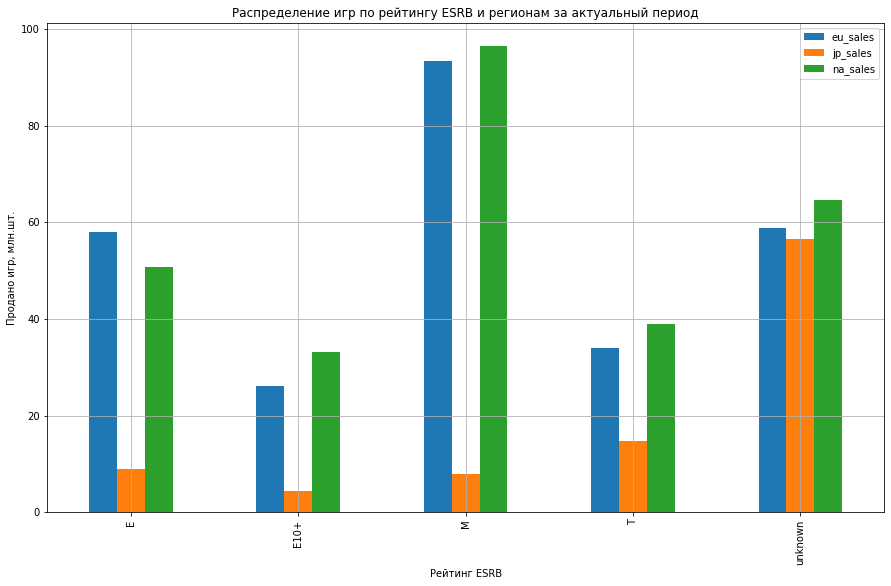

In [43]:
region_rating.plot(kind = 'bar')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продано игр, млн.шт.')
plt.grid()
plt.legend()
plt.title('Распределение игр по рейтингу ESRB и регионам за актуальный период');

И опять игроки из Европы и Северной Америки имеют схожие предпочтения, а игроки из Японии отличаются. В Европе и СА популярны игры с рейтингом «M» («Mature») — «Для взрослых», а также «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам», а игры с неустановленным рейтингом занимают второе место.В Японии также с сильным отрывом лидируют игры с неустановленным возрастным рейтингом.

Европейский топ по рейтингу ESRB:
- «M» («Mature») — «Для взрослых»;
- Рейтинг неустановлен;
- «E» («Everyone») — «Для всех»;
- «T» («Teen») — «Подросткам»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

Североамериканский топ по рейтингу ESRB:
- «M» («Mature») — «Для взрослых»;
- Рейтинг неустановлен;
- «E» («Everyone») — «Для всех»;
- «T» («Teen») — «Подросткам»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

Японский топ по рейтингу ESRB:
- Рейтинг неустановлен;
- «T» («Teen») — «Подросткам»;
-  «E» («Everyone») — «Для всех»;
- «M» («Mature») — «Для взрослых»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

**Вывод:**
Портрет европпейского игрока: отдают предпочтение стационарным консолям PS4, XOne и PS3, из портативны консолей предпочитают 3DS, часть игроков предпочитают PC. Топ жанров: Action, Shooter, Sports, Role-Playing, Racing. Чаще всего играют в игры с рейтингом «M» или неустановленным.

Портрет североамериканского игрока: также отдают предпочтение стационарным консолям PS4, XOne, X360 и PS3, из портативных консолей выбирают 3DS. Любимые жанры практически полностью совпадают с европейскими, но вместо Racing американцы выбирают Misc и чаще предпочитают шутеры экшенам. Также чаще всего играют в игры с рейтингом «M» или неустановленным.

Портрет японского игрока: японцы отдают предпочтение японским консолям, в портативным 3DS и PSV, из стационарных выбирают WiiU, PS3 и PS4. Любимые жанры также отличаются: Role-Playing, Action, Misc, Fighting и Shooter. Для большей части купленных японцами игр возрастной рейтинг неустановлен.

#### Проверка гипотез

##### Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?

Сформулирую гипотезу:
- $H_0:$ средние пользовательские рейтинги платформ Xbox One и PC одинаковы
- $H_1:$ средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень статистической значимости возьму 5%.

In [44]:
pc_rating = actual_data.query('platform == "PC" and user_score < 15')
xone_rating = actual_data.query('platform == "XOne" and user_score < 15')

# проверю гипотезу
alpha = 0.05
results = st.ttest_ind(pc_rating['user_score'], xone_rating['user_score'], equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаю нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [45]:
# выведу средние значения
mean_rating = actual_data.query('platform == ["PC", "XOne"] and user_score < 15').pivot_table(index = 'platform', values = 'user_score', aggfunc = 'mean')
mean_rating

,user_score
platform,
PC,6.298361
XOne,6.594545


Отвергнуть нулевую гипотезу не получилось, а это значит, что средние оценки пользователей платформ одинаковы.

##### Разные ли средние пользовательские рейтинги жанров Action и Sports разные?

Сформулирую гипотезу:
- $H_0:$ средние пользовательские рейтинги жанров Action и Sports одинаковы
- $H_1:$ средние пользовательские рейтинги жанров Action и Sports различаются

Уровень статистической значимости возьму 5%.

In [46]:
action_rating = actual_data.query('genre == "Action" and user_score < 15')
sports_rating = actual_data.query('genre == "Sports" and user_score < 15')

# проверю гипотезу
alpha = 0.05
results = st.ttest_ind(action_rating['user_score'], sports_rating['user_score'], equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаю нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаю нулевую гипотезу


In [47]:
# выведу средние значения
genre_rating = actual_data.query('genre == ["Action", "Sports"] and user_score < 15'). pivot_table(index = 'genre', values = 'user_score', aggfunc = 'mean')
genre_rating

,user_score
genre,
Action,6.760606
Sports,5.225197


Нулевая гипотеза отвергнута, а это значит, что средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод:** В данном пункте была осуществленна проверка двух гипотиз, из которых можно сделать следующие выводы:
-  средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
- средние пользовательские рейтинги жанров Action и Sports различаются.

#### Общий вывод

Задачей данного проекта было проанализировать данные интернет-магазина «Стримчик» и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В ходе предобработки данных названия столбцов были приведены к нижнему регистру, удалены строки с пропусками в названиях, жанрах игр(2 строки) и с годом выпуска(269 строк), пропуски в столбцах `critic_score` и `user_score` были оставлены, значениями tbd в столбце user_score заменены на NaN, заменять их нечем, а так датафрейм будет более однообразным. Пропуски в столбце `rating` заменил на "unknown", так как их нечем заменить, а их доля велика. Также был найден и удалён один неявный дубликат.

В ходе исследовательского анализа было выявлено следующее:
- Пик выхода игр пришёлся на период с 2007 по 2010 гг., до 1994 г. выходило меньше ста игр в год;
- Самые популярные платформы за всё время PS2, PS3, X360, Wii и DS постепнно набирали свою популярность и также постепенно её теряли, к 2016 г. утратили свою популярность;
- Нормальная продолжительность жизни платформы составляет от 4 до 11 лет, медианная и средняя продолжительности в районе 7.7 лет;
- В качестве актуального я бы взял период с 2014 по 2016 гг;
- В актуальном периоде самыми прибыльными платформами являются Playstation 4, Xbox One, в 2015 году у этих платформ был пик, так как на них вышла очень популярная GTA 5, продажи игр по остальным платформам стабильно падают, Playstation Portable на 2016 год является мертвой платформой;
- Наблюдается прямая зависимость между отзывов критиков и продажами, зависимость между отзывами пользователей и продажами практически отсутствует;
- Игры жанра Action является самым популярными и выпускаемыми. 

В четвёртом пункте пункте был составлен портрет пользователя каждого региона:
Портрет европпейского игрока: отдают предпочтение стационарным консолям PS4, XOne и PS3, из портативны консолей предпочитают 3DS, часть игроков предпочитают PC. Топ жанров: Action, Shooter, Sports, Role-Playing, Racing. Чаще всего играют в игры с рейтингом «M» или неустановленным.

Портрет североамериканского игрока: также отдают предпочтение стационарным консолям PS4, XOne, X360 и PS3, из портативных консолей выбирают 3DS. Любимые жанры практически полностью совпадают с европейскими, но вместо Racing американцы выбирают Misc и чаще предпочитают шутеры экшенам. Также чаще всего играют в игры с рейтингом «M» или неустановленным.

Портрет японского игрока: японцы отдают предпочтение японским консолям, в портативным 3DS и PSV, из стационарных выбирают WiiU, PS3 и PS4. Любимые жанры также отличаются: Role-Playing, Action, Misc, Fighting и Shooter. Для большей части купленных японцами игр возрастной рейтинг неустановлен.

А также была проведена проверка гипотез, из которых следуют следующие выводы:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
* средние пользовательские рейтинги жанров Action и Sports различаются.

По итогу работы можно сформулировать следующие закономерности, определяющие успешность игры:

- Жанр `Action` или `Shooter`;
- Возрастной рейтинг «M»;
- Современные платформы PS4 или Xbox One;

Эти закономерности действуют на Европейский и Североамериканский рынки, для Японского сложно определить, так как большинство игр не имеют возрастного рейтинга ESRB, в Японии действует своя система рейтинга, которая не представлена в исходных данных.